# JupyterLab Notebook with DyalogAPL and RSconnect (R and Rserve)


## What do i need to present data and scripts transparently?
* A Swiss knife tool - [Dyalog APL](https://www.dyalog.com/)
* Database (query language) - [data.table](https://rdatatable.gitlab.io/data.table/) or [DuckDB](https://duckdb.org/) in [R](https://www.r-project.org/)
* Notebook (transparency requires scripting) - [JupyterLab](https://jupyter.org/) with native support for vega-lite
* Graphics library - [vega-lite](https://vega.github.io/vega-lite/)

## Preparations
### Install dotnet 3.1 core
```APL
DYALOG_NETCORE=1
```
### Install [JupyterLab](https://jupyter.org/)
```bash
pip install jupyterlab
```
### Clone [dyalog-jupyter-kernel](https://github.com/kimmolinna/dyalog-jupyter-kernel)
Copy cloned files to the present structure
```bash
[Python Folder]\share\jupyter\kernels\dyalog-kernel
[Python Folder]\Lib\site-packages\dyalog_kernel
```
### Install [Rserve](https://www.rforge.net/Rserve/)
"Rserve is a TCP/IP server which allows other programs to use facilities of R (see www.r-project.org) from various languages without the need to initialize R or link against R library. Every connection has a separate workspace and working directory."
```R
Install.packages ("Rserve")
```
Copy Rserve files from the library-folder to the present R structure
```bash
[R Folder]\R-4.1.0\library\Rserve\libs\x64 -> [R Folder]\R-4.1.0\bin\x64
```
### Install [data.table](https://rdatatable.gitlab.io/data.table/)
```R
Install.packages ("data.table")
```
[Database-like ops benchmark](https://h2oai.github.io/db-benchmark/)
### Install [DuckDB](https://duckdb.org/)
```R
Install.packages ("duckdb")
```
[Querying Parquet with Precision using DuckDB](https://duckdb.org/2021/06/25/querying-parquet.html)

[Apache Arrow](https://arrow.apache.org/)
### Clone [rsconnect](https://github.com/kimmolinna/rsconnect)
Interface for R connection from DyalogAPL with Rserve
    

In [1]:
]boxing off
]config DYALOG_NETCORE

Was ON

DYALOG_NETCORE 1

In [2]:
]LINK.create jlab jlab

Linked: #.jlab ←→ C:\Users\ay29782\OneDrive - finnair365\demo\jlab

In [3]:
2⎕fix 'file://../demo/rsconnect/rserve.dyalog'
RS.start
⎕ex 'r' ⋄ r←⎕new RS.Rserve

In [4]:
0 r.eval 'library(data.table)'
r.eval 'library(DBI)'

DBI data.table stats graphics grDevices utils datasets methods base

In [5]:
0 r.eval 'con = dbConnect(duckdb::duckdb(), dbdir=":memory:", read_only=FALSE)'

In [6]:
0 r.eval 'cars<-copy(mtcars)' 
0 r.eval 'setDT(cars,keep.rownames = T)'

In [7]:
cars←r.eval 'cars'

In [8]:
cars

#.[Rserve].[robject]

In [9]:
cars.attributes[⊂'class']

data.table data.frame

In [10]:
:markdown
jlab.table cars.value[⍳5;]

|rn|mpg|cyl|disp|hp|drat|wt|qsec|vs|am|gear|carb|
|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|
|Mazda RX4|21|6|160|110|3.9|2.62|16.46|0|1|4|4|
|Mazda RX4 Wag|21|6|160|110|3.9|2.875|17.02|0|1|4|4|
|Datsun 710|22.8|4|108|93|3.85|2.32|18.61|1|1|4|1|
|Hornet 4 Drive|21.4|6|258|110|3.08|3.215|19.44|1|0|3|1|



In [11]:
0 r.eval 'dbWriteTable(con, "cars", cars)'
r.eval 'dbGetQuery(con, "SELECT * FROM cars LIMIT 5")'

#.[Rserve].[robject]

In [12]:
db←r.eval 'dbGetQuery(con, "SELECT * FROM cars LIMIT 5")'

In [14]:
:markdown
jlab.table db.value

|rn|mpg|cyl|disp|hp|drat|wt|qsec|vs|am|gear|carb|
|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|
|Mazda RX4|21|6|160|110|3.9|2.62|16.46|0|1|4|4|
|Mazda RX4 Wag|21|6|160|110|3.9|2.875|17.02|0|1|4|4|
|Datsun 710|22.8|4|108|93|3.85|2.32|18.61|1|1|4|1|
|Hornet 4 Drive|21.4|6|258|110|3.08|3.215|19.44|1|0|3|1|
|Hornet Sportabout|18.7|8|360|175|3.15|3.44|17.02|0|0|3|2|



In [15]:
cars.value[⍳6;]≡db.value

1

In [16]:
data←r.eval 'cars[,.(cyl,qsec)]'

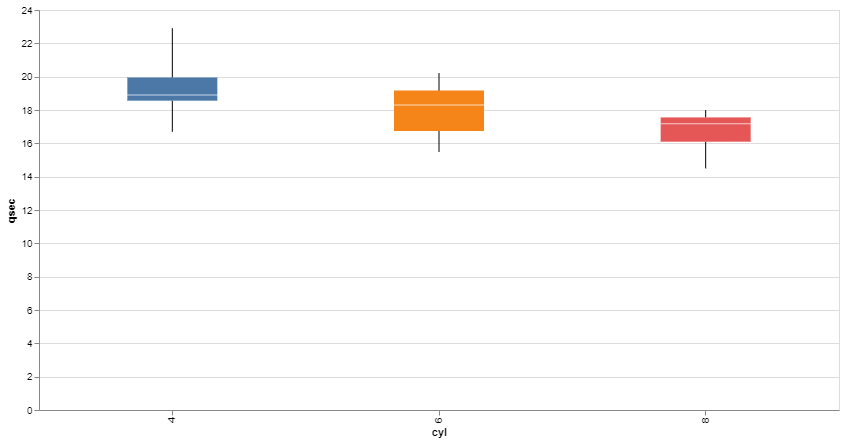

In [17]:
:vega-lite
('cyl' 'qsec')jlab.vega.do jlab.vega.json_data data

In [18]:
('cyl' 'qsec')jlab.vega.do jlab.vega.json_data data

{"$schema": "https://vega.github.io/schema/vega-lite/v5.json","description": "A vertical box plot showing median, min, and max block hours.","width": 800,"height": 400,"data": {"values":[{"cyl":6,"qsec":16.46},{"cyl":6,"qsec":17.02},{"cyl":4,"qsec":18.61},{"cyl":6,"qsec":19.44},{"cyl":8,"qsec":17.02},{"cyl":6,"qsec":20.22},{"cyl":8,"qsec":15.84},{"cyl":4,"qsec":20},{"cyl":4,"qsec":22.9},{"cyl":6,"qsec":18.3},{"cyl":6,"qsec":18.9},{"cyl":8,"qsec":17.4},{"cyl":8,"qsec":17.6},{"cyl":8,"qsec":18},{"cyl":8,"qsec":17.98},{"cyl":8,"qsec":17.82},{"cyl":8,"qsec":17.42},{"cyl":4,"qsec":19.47},{"cyl":4,"qsec":18.52},{"cyl":4,"qsec":19.9},{"cyl":4,"qsec":20.01},{"cyl":8,"qsec":16.87},{"cyl":8,"qsec":17.3},{"cyl":8,"qsec":15.41},{"cyl":8,"qsec":17.05},{"cyl":4,"qsec":18.9},{"cyl":4,"qsec":16.7},{"cyl":4,"qsec":16.9},{"cyl":8,"qsec":14.5},{"cyl":6,"qsec":15.5},{"cyl":8,"qsec":14.6},{"cyl":4,"qsec":18.6}]},"mark": {"type": "boxplot","extent": "min-max"},"encoding": {"x": {"field": "cyl", "type": "nominal"},"color": {"field": "cyl", "type": "nominal", "legend": null},"y": {"field": "qsec","type": "quantitative","scale": {"zero": true}},"size": {"value": 90}}}